# Incremental learning with keras




In [1]:
%matplotlib inline
#load dataset
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

#split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.25, random_state=0)

#split 2 parts, p1 will be the first training and p2 will have a future split
x_train_p1, x_train_p2, y_train_p1, y_train_p2 = train_test_split(x_train, y_train, test_size=0.50, random_state=0)
x_test_p1, x_test_p2, y_test_p1, y_test_p2 = train_test_split(x_test, y_test, test_size=0.50, random_state=0)
import warnings
warnings.filterwarnings('ignore')



In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense


In [3]:
x, y = x_train_p1, y_train_p1
x_val, y_val = x_test_p1, y_test_p1


# 2-class logistic regression in Keras
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=x.shape[1]))
model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=['accuracy'])
train_history = model.fit(x, y, epochs=50, validation_data=(x_val, y_val))



2022-04-02 15:46:55.396129: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 15:46:55.418834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 15:46:55.419165: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 15:46:55.419855: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Epoch 1/50
7/7 [==============================] - 0s 15ms/step - loss: 112.8226 - accuracy: 0.3568 - val_loss: 112.9611 - val_accuracy: 0.3380
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 106.9576 - accuracy: 0.3568 - val_loss: 107.1518 - val_accuracy: 0.3380
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 101.3946 - accuracy: 0.3568 - val_loss: 101.2896 - val_accuracy: 0.3380
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 95.6358 - accuracy: 0.3568 - val_loss: 95.4437 - val_accuracy: 0.3380
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 90.1038 - accuracy: 0.3568 - val_loss: 89.5585 - val_accuracy: 0.3380
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 84.3951 - accuracy: 0.3568 - val_loss: 83.7133 - val_accuracy: 0.3380
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 78.7354 - accuracy: 0.3568 - val_loss: 77.9073 - val_accuracy: 0.3380
Epoch 8/50
7/

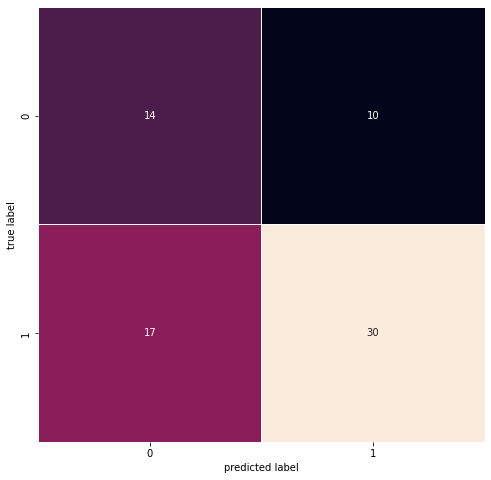

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

    
y_pred = model.predict(x_val)    
y_pred = np.round(abs(y_pred))    
plot_confusion_matrix(y_val, y_pred)


[[-0.15967347]
 [ 0.26998806]
 [ 0.22733374]
 [-0.1995599 ]
 [-0.12961762]
 [ 0.30864668]
 [ 0.28732288]
 [-0.26134914]
 [ 0.18368493]
 [ 0.06350303]
 [-0.14212686]
 [ 0.06590744]
 [-0.24003497]
 [-0.18793696]
 [ 0.61202437]
 [ 0.33360258]
 [ 0.42428872]
 [-0.23352131]
 [ 0.32874322]
 [ 0.46687877]
 [-0.27363274]
 [ 0.5209301 ]
 [ 0.24997701]
 [ 0.08426166]
 [-0.18419626]
 [-0.02623429]
 [-0.05641017]
 [-0.00454861]
 [ 0.37695074]
 [ 0.55772656]]


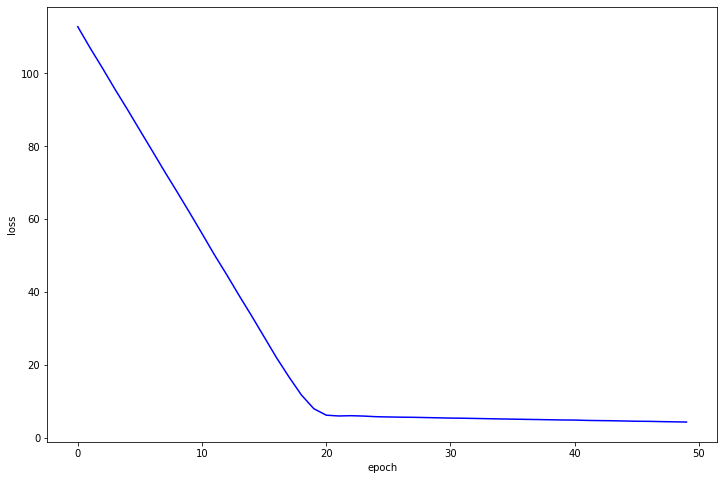

In [5]:
W_tf, b_tf = [x.numpy() for x in model.weights]
print(W_tf)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(np.arange(50),train_history.history['loss'], 'b-', label='loss')
xlab, ylab = ax.set_xlabel('epoch'), ax.set_ylabel('loss')

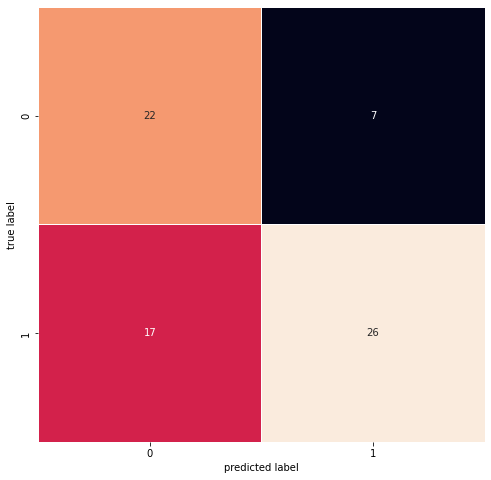

In [6]:
x, y = x_train_p2, y_train_p2
x_val, y_val = x_test_p2, y_test_p2

model.layers[0].trainable = False  # Freeze

train_history = model.train_on_batch(x,y, return_dict=True)
model.test_on_batch(x_val,y_val)


y_pred = model.predict_on_batch(x_val)    
y_pred = np.round(abs(y_pred))    
plot_confusion_matrix(y_val, y_pred)

In [7]:
W_tf, b_tf = [x.numpy() for x in model.weights]
W_tf

array([[-0.15943906],
       [ 0.2701456 ],
       [ 0.227562  ],
       [-0.19937862],
       [-0.12941791],
       [ 0.3086982 ],
       [ 0.28709167],
       [-0.26153767],
       [ 0.18389142],
       [ 0.063729  ],
       [-0.14204091],
       [ 0.06611466],
       [-0.23995033],
       [-0.18804415],
       [ 0.61228436],
       [ 0.33380765],
       [ 0.42448658],
       [-0.23327552],
       [ 0.32903206],
       [ 0.46712515],
       [-0.27347484],
       [ 0.52102476],
       [ 0.25012714],
       [ 0.0842225 ],
       [-0.18405144],
       [-0.02638314],
       [-0.05667087],
       [-0.00471276],
       [ 0.37707806],
       [ 0.55786103]], dtype=float32)

In [8]:
train_history

{'loss': 4.3377909660339355, 'accuracy': 0.577464759349823}

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 0
Non-trainable params: 31
_________________________________________________________________


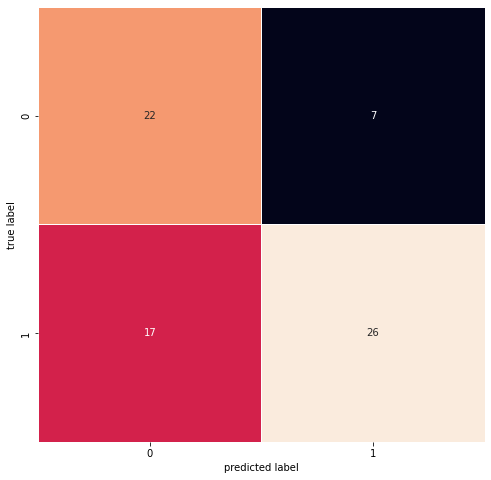

In [10]:
y_pred = model.predict_on_batch(x_val)    
y_pred = np.round(abs(y_pred))    
plot_confusion_matrix(y_val, y_pred)

In [11]:
a = model.get_weights()
a[0][0] = 0.222
model.set_weights(a)

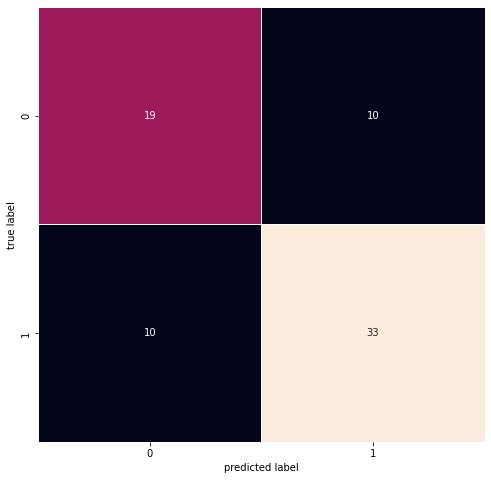

In [12]:
y_pred = model.predict_on_batch(x_val)    
y_pred = np.round(abs(y_pred))    
plot_confusion_matrix(y_val, y_pred)